In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import pickle
import os,sys
import pyxdf as xdf
import torch
from torch.utils.data import DataLoader


sys.path.append("../models/model_based_files/")
sys.path.append("../models/Data_based_models/transformer_1/")
sys.path.append("../models/Data_based_models/LSTM1/")
from Speed_Recognition_3 import SpeedRecProcessing as SRP
from model_2 import Speed_model_2 as SP

from model2 import CNN_LSTM as CLSTM
from preprocessing1 import preprocess,split
from dataset import IMU

/home/prestige/Documents/venvs/activity_class/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X,Y=preprocess()

Exception: file ../../../Recordings/sub-P001/ses-S001/sub-P001_ses-S001_task-Default_run-010_eeg.xdf does not exist.

# Directory Information

In [4]:
sub_1=os.listdir("../Recordings/sub-P001/")
sub_2=os.listdir("../Recordings/sub-P002/")
sub_3=os.listdir("../Recordings/sub-P003/")

print(sub_1)
print(sub_2)
print(sub_3)

['sub-P001_ses-S001_task-Default_run-011_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-001_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-013_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-009_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-003_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-010_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-008_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-002_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-005_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-006_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-004_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-007_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-012_eeg.xdf']
['sub-P001_ses-S001_task-Default_run-011_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-001_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-013_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-009_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-003_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-010_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-008_eeg.xdf'

# Simulations and plotting

2023-02-20 22:04:45.315 (6699.904s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:45.316 (6699.904s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:04:45.316 (6699.904s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:04:45.316 (6699.904s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:45.316 

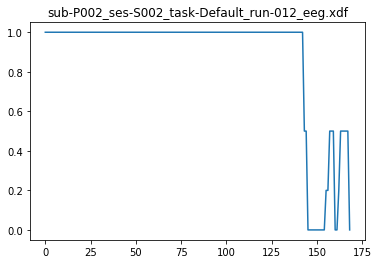

2023-02-20 22:04:46.901 (6701.490s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:46.901 (6701.490s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:04:46.901 (6701.490s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:04:46.901 (6701.490s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:46.901 

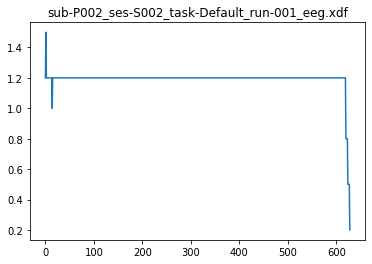

2023-02-20 22:04:50.667 (6705.256s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:50.667 (6705.256s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:04:50.668 (6705.256s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:04:50.668 (6705.256s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:50.668 

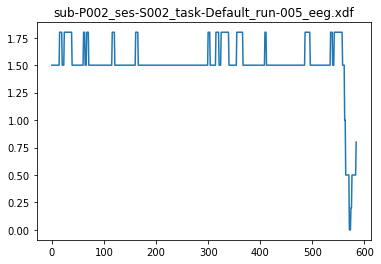

2023-02-20 22:04:54.811 (6709.400s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:54.811 (6709.400s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:04:54.811 (6709.400s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:04:54.812 (6709.400s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:54.812 

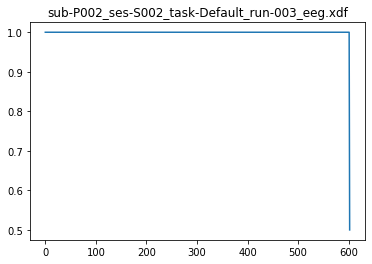

2023-02-20 22:04:58.387 (6712.975s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:58.387 (6712.975s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:04:58.387 (6712.975s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:04:58.387 (6712.975s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:04:58.387 

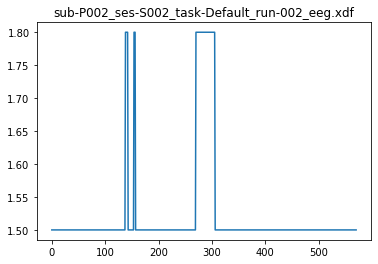

2023-02-20 22:05:01.733 (6716.322s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:01.734 (6716.322s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:01.734 (6716.322s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:01.734 (6716.322s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:01.734 

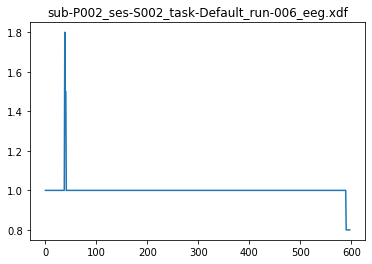

2023-02-20 22:05:05.223 (6719.812s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:05.223 (6719.812s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:05.223 (6719.812s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:05.223 (6719.812s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:05.223 

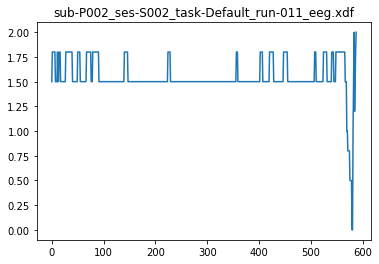

2023-02-20 22:05:08.658 (6723.246s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:08.658 (6723.247s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:08.658 (6723.247s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:08.658 (6723.247s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:08.658 

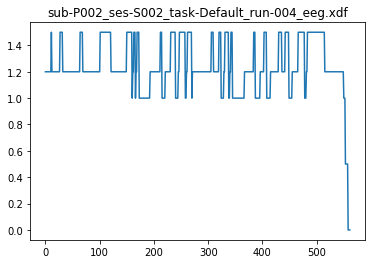

2023-02-20 22:05:11.835 (6726.423s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:11.835 (6726.423s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:11.835 (6726.423s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:11.835 (6726.423s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:11.835 

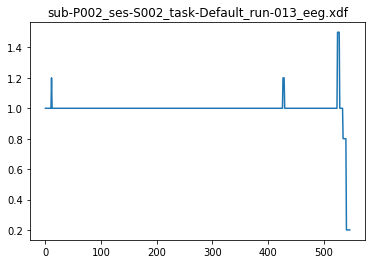

2023-02-20 22:05:15.007 (6729.595s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:15.007 (6729.595s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:15.007 (6729.595s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:15.007 (6729.595s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:15.007 

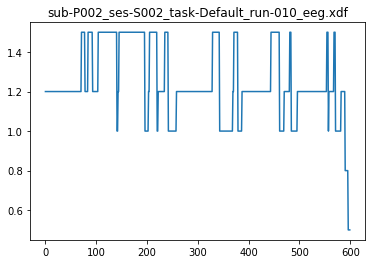

2023-02-20 22:05:18.351 (6732.939s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:18.351 (6732.939s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:18.351 (6732.939s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:18.351 (6732.939s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:18.351 

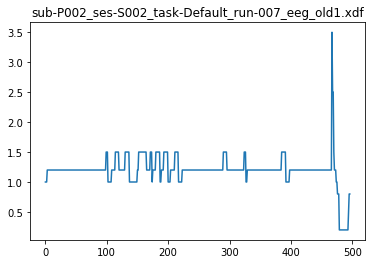

2023-02-20 22:05:21.219 (6735.807s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:21.219 (6735.807s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:21.219 (6735.807s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:21.219 (6735.807s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:21.219 

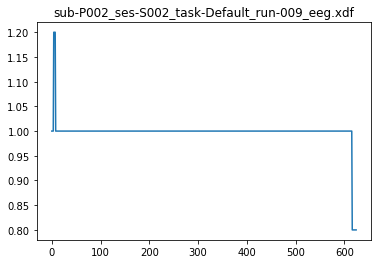

2023-02-20 22:05:24.842 (6739.430s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:24.842 (6739.430s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:24.842 (6739.430s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:24.842 (6739.430s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:24.842 

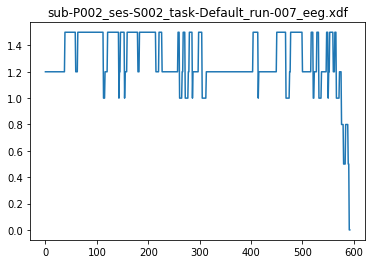

2023-02-20 22:05:28.052 (6742.640s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:28.052 (6742.640s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-20 22:05:28.052 (6742.640s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-02-20 22:05:28.052 (6742.640s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-20 22:05:28.052 

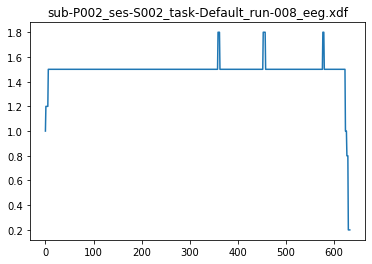

In [16]:

for file in sub_3:
    x1=SRP(h=110,c=0.5)
    data=x1.Speed_estimation_simulation(filepath='../Recordings/sub-P003/'+file,r_number=0.25)
    plt.figure()
    plt.plot(data['Double'])
    plt.title(file)
    plt.show()

# Data Prep

In [76]:
run=13
path=f'../Recordings/sub-P002/sub-P001_ses-S001_task-Default_run-0{run}_eeg.xdf'
#path1='../Recordings/sub-P003/sub-P002_ses-S002_task-Default_run-007_eeg_old1.xdf'
streams, fileheader = xdf.load_xdf(path)
for stream in streams:
    if stream['info']['name'][0]=='polar accel':
        print('here')
        data=stream['time_series']
        length=data.shape[0]
        data=data[200:int(0.9*length),:]
        print(data.shape)
        label=1
        dic={'data':data,'label':label}
with open(f'../Recordings/sub-P002/pickled_data/{run}.pickle','wb') as f:
    pickle.dump(dic,f)

here
(53324, 3)


# Data Loading

In [89]:
run=3
path=f'../Recordings/sub-P004/pickled_data/{run}.pickle'

with open(path,'rb') as f:
    d=pickle.load(f)
    print('here')
    

data=d['data']


here


In [2]:
run=13
path=f'../sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg.xdf'

data,header=xdf.load_xdf(path)

for stream in data:
    if stream['info']['name'][0]=='imu_stream_new':
        imu_data=stream['time_series']
        print('imu data')
    if stream['info']['name'][0]=='polar accel':
        polar_data=stream['time_series']
        print('polar data')
data=polar_data

Stream 1: Calculated effective sampling rate 163.1623 Hz is different from specified rate 200.0000 Hz.


polar data


In [3]:
norm=pickle.load(open('../models/Data_based_models/LSTM2/normalizer.pkl','rb'))

In [7]:
X,Y=split(data,1
          ,window=1,sample_rate=200,vert_acc_i=0,interval=0.5)
#test_dataset=IMU(X,Y,size=400,num_features=6)
#test_loader=DataLoader(test_dataset,batch_size=1)
X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X=norm.fit_transform(X)
X=X.reshape(X.shape[0],3,200)
print(X.shape)

(499, 3, 200)


# Model Loading

In [16]:
model=CLSTM(input_size=3,num_classes=3,input_length=200)

model.load_state_dict(torch.load("../models/Data_based_models/LSTM2/model_10.h5"))

<All keys matched successfully>

In [24]:
model.eval()
X=X.reshape((-1,3,200))
preds=[]
with torch.no_grad():
    for i in range(X.shape[0]):
        output=model.forward_run(X[i,:,:])
        _,prediction=torch.max(output.data,1)
        preds+=prediction.detach().cpu()
        #preds=output.detach().cpu().numpy()
        

In [25]:
insatance=SRP(h=110,
              c=1.45)
speeds=insatance.Speed_estimation_simulation(data=data[:,0],split_interval=0.5,r_number=0.25,data_flag=True)

2023-02-22 16:43:01.346 ( 863.683s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:3925:f55:6b2f:6a95 (Address already in use)
2023-02-22 16:43:01.346 ( 863.683s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100::db73 (Address already in use)
2023-02-22 16:43:01.346 ( 863.683s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:8110:6cdb:f7cf:8e3e (Address already in use)
2023-02-22 16:43:01.346 ( 863.683s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-02-22 16:43:01.346 ( 863.6

In [26]:
for i,v in enumerate(preds):
    if v==0:
        preds[i]=1
    if v==1:
        preds[i]=1.25
    if v==2:
        preds[i]=1.5

(0.8, 1.8)

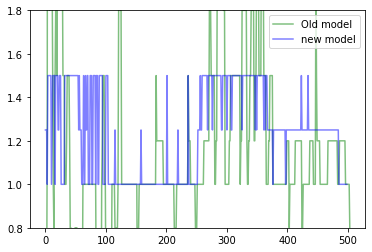

In [27]:
plt.plot(speeds['Double'],'g',alpha=0.5)
plt.plot(preds,'b',alpha=0.5)
plt.legend(['Old model','new model'])
plt.ylim([0.8,1.8])

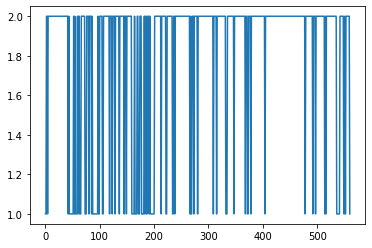

In [55]:
plt.plot(preds)

# Augment the data with some noise


In [31]:
run=2
path=f'../Recordings/sub-P002/pickled_data/{run}.pickle'

with open(path,'rb') as f:
    d=pickle.load(f)
    print('here')
    

data=d['data']


here


In [60]:
noise=np.random.normal(0,5,data.shape)

In [61]:
augmented_data=data+noise

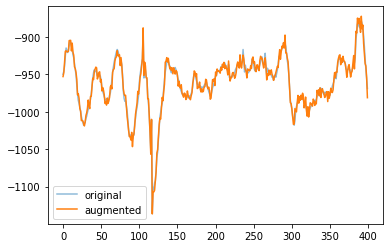

In [62]:
plt.plot(data[:400,0],alpha=0.5)
plt.plot(augmented_data[:400,0])
plt.legend(['original','augmented'])

In [59]:
print(np.mean(data,axis=0))
print(np.mean(augmented_data,axis=0))

[-943.1897     25.928131  287.65912 ]
[-943.19967183   25.9577703   287.63827827]


In [79]:

for i in range(1,4):
    path=f'../Recordings/sub-P004/pickled_data/{i}.pickle'
    with open(path,'rb') as f:
        d=pickle.load(f)
        print('here')
    data=d['data']
    noise=np.random.normal(0,4,data.shape)
    augmented_data=data+noise
    d['data']=augmented_data
    save_path=f'../Recordings/sub-P004/aug_data/{i}_augmented.pickle'
    with open(save_path,'wb') as f:
        pickle.dump(d,f)     

here
here
here


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


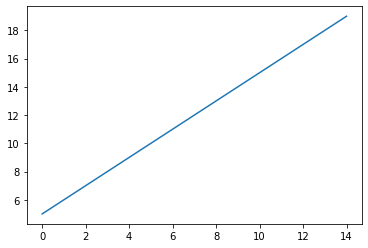

In [33]:
g=np.arange(1,20)
plt.plot(g[-15:])
print(g)